In [1]:
#!pip install statsmodels==v0.11.0rc2

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
from statsmodels.tsa.stattools import adfuller

In [3]:
co2 = pd.read_csv('co2.csv', sep='\t') 
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


Text(0.5, 0, 'Data')

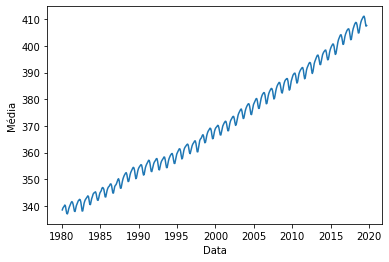

In [4]:
plt.plot(co2['data'], co2['media'])
plt.ylabel('Média')
plt.xlabel('Data')

In [5]:
nascimento = pd.read_csv('nascimentos.csv') 
nascimento.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [6]:
nascimento['data'] = pd.to_datetime(nascimento['data'])
nascimento.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 0, 'Data')

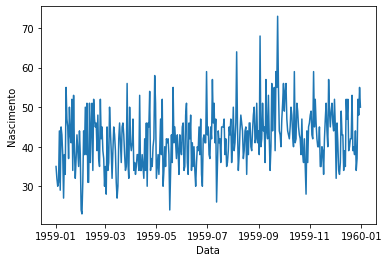

In [7]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.ylabel('Nascimento')
plt.xlabel('Data')

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
nascimento.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 0, 'Data')

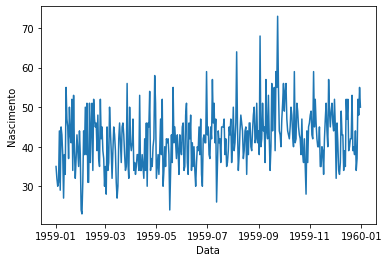

In [10]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.ylabel('Nascimento')
plt.xlabel('Data')

##previsão pela média

In [11]:
co2_media = np.mean(co2['media'])
co2_media

370.1031446540881

In [12]:
dt_co2 = co2['data'][1] - co2['data'][0]

Text(0.5, 0, 'Data')

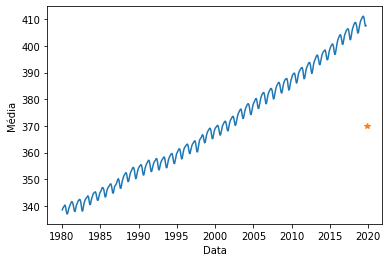

In [13]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1,0]+dt_co2, co2_media, '*')
plt.ylabel('Média')
plt.xlabel('Data')

In [14]:
nasc_media = np.mean(nascimento['n_nasc'])
nasc_media

41.98082191780822

In [15]:
dt_nasc = nascimento['data'][1] - nascimento['data'][0]
dt_nasc

Timedelta('1 days 00:00:00')

Text(0.5, 0, 'Data')

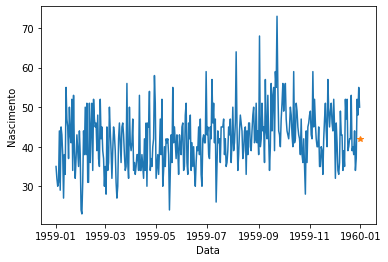

In [16]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.plot(nascimento.iloc[-1,0]+dt_nasc, nasc_media, '*')
plt.ylabel('Nascimento')
plt.xlabel('Data')

In [17]:
co2.shape

(477, 2)

In [18]:
co2_3media = np.mean(co2['media'][co2.shape[0]-4:co2.shape[0]-1])

Text(0.5, 0, 'Data')

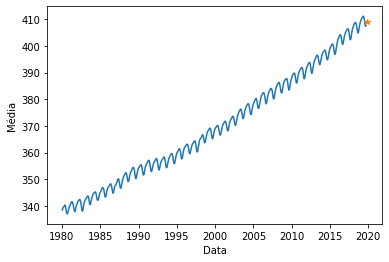

In [19]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1,0]+dt_co2, co2_3media, '*')
plt.ylabel('Média')
plt.xlabel('Data')

In [20]:
nasc_3media = np.mean(nascimento['n_nasc'][nascimento.shape[0]-4:nascimento.shape[0]-1])

Text(0.5, 0, 'Data')

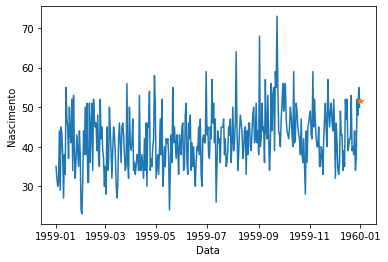

In [21]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.plot(nascimento.iloc[-1,0]+dt_nasc, nasc_3media, '*')
plt.ylabel('Nascimento')
plt.xlabel('Data')

##Média móvel

In [22]:
co2_media_movel = co2.rolling(10).mean()

Text(0.5, 0, 'Data')

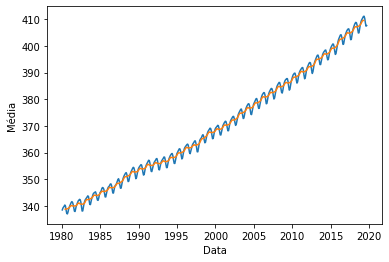

In [23]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2_media_movel['data'], co2_media_movel['media'])
plt.ylabel('Média')
plt.xlabel('Data')

In [24]:
nasc_media_movel = nascimento.rolling(5).mean()

Text(0.5, 0, 'Data')

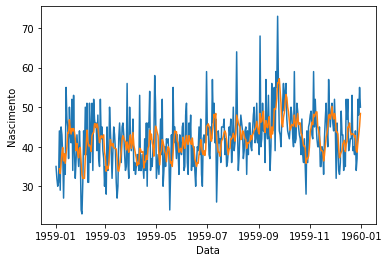

In [25]:
plt.plot(nascimento['data'], nascimento['n_nasc'])
plt.plot(nascimento['data'], nasc_media_movel['n_nasc'])
plt.ylabel('Nascimento')
plt.xlabel('Data')

##Statsmodel

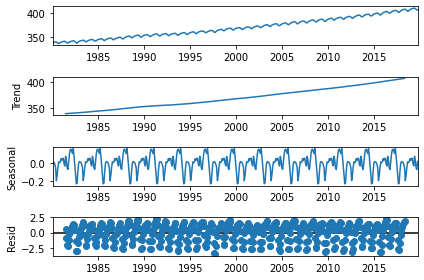

In [26]:
co2_result = seasonal_decompose(co2.set_index('data'), period=35)
co2_result.plot();

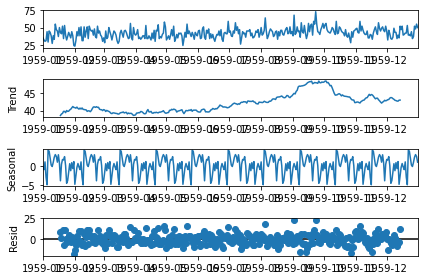

In [27]:
nasc_result = seasonal_decompose(nascimento.set_index('data'), period=35)
nasc_result.plot();

##Verificação de estacionariedade

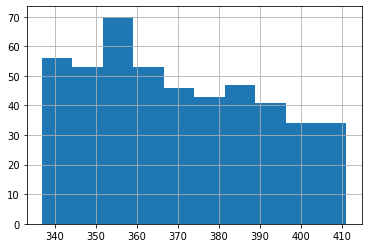

In [28]:
co2.media.hist()

In [30]:
divide = int(len(co2)/2)

In [31]:
x = co2['media'].values

In [32]:
c1 , c2 = x[0:divide], x[divide:]

In [39]:
print(len(co2['media']), len(c1), len(c2))

477 238 239


In [40]:
print(co2['media'].mean(), c1.mean(), c2.mean())

370.1031446540881 352.31550420168065 387.816359832636


In [41]:
print(co2['media'].var(), c1.var(), c2.var())

428.7789375693673 73.90219533401597 151.542490933282


In [42]:
divide = int(len(nascimento)/2)

In [43]:
x = nascimento['n_nasc'].values

In [44]:
nasc1 , nasc2 = x[0:divide], x[divide:]

In [45]:
print(len(nascimento['n_nasc']), len(nasc1), len(nasc2))

365 182 183


In [46]:
print(nascimento['n_nasc'].mean(), nasc1.mean(), nasc2.mean())

41.98082191780822 39.76373626373626 44.185792349726775


In [47]:
print(nascimento['n_nasc'].var(), nasc1.var(), nasc2.var())

53.996883937979796 49.21341021615746 48.708650601690096


##Teste ADF

In [50]:
c_resultado = adfuller(co2['media'].values)

In [53]:
print(f'Resultado ADF {c_resultado[0]:.4f}.') #para valores negativos indica série estacionária, neste caso o resultado indica que a série não é estácionária

Resultado ADF 3.0368.


In [54]:
print(f'Resultado p-value {c_resultado[1]:.4f}.') #para valores menor que 0.05 - série estacionária, para maiores a série não é estacionária

Resultado p-value 1.0000.


In [55]:
nasc_resultado = adfuller(nascimento['n_nasc'].values)

In [56]:
print(f'Resultado ADF {nasc_resultado[0]:.4f}.') #Série estacionária

Resultado ADF -4.8083.


In [57]:
print(f'Resultado p-value {nasc_resultado[1]:.4f}.') #Série estacionária

Resultado p-value 0.0001.


##Diferenciação

In [ ]:
#diferenca(t) = serie(t) - serie(t-1) retirada da diferenciação
#serie_recuperada = diferenca(t) + serie(t-1) recuperação da diferenciação após a previsão

In [60]:
serie_diferenciada = nascimento['n_nasc'].diff()

Text(0.5, 0, 'Data')

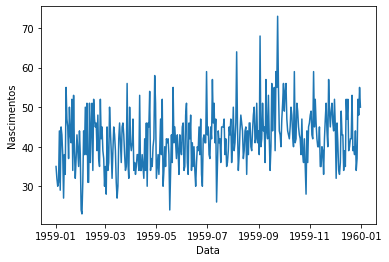

In [62]:
plt.plot(nascimento['data'],nascimento['n_nasc'])
plt.ylabel('Nascimentos')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

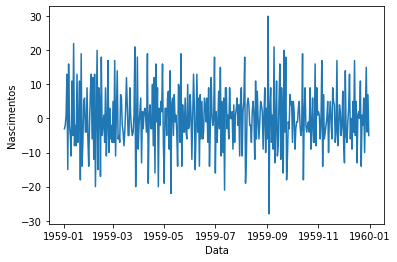

In [63]:
plt.plot(nascimento['data'],serie_diferenciada)
plt.ylabel('Nascimentos')
plt.xlabel('Data')

In [64]:
serie_diferenciada = co2['media'].diff()

Text(0.5, 0, 'Data')

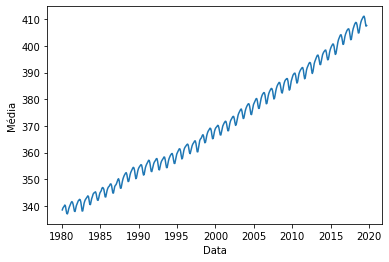

In [65]:
plt.plot(co2['data'],co2['media'])
plt.ylabel('Média')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

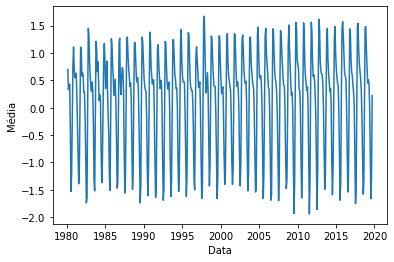

In [66]:
plt.plot(co2['data'],serie_diferenciada)
plt.ylabel('Média')
plt.xlabel('Data')

##Suavização exponencial

In [ ]:
co2 = co2.set_index('data')

In [71]:
co2.head()

,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30


In [70]:
co2.tail()

,media
data,
2019.375,411.16
2019.458,410.35
2019.542,408.69
2019.625,407.43
2019.708,407.65


In [72]:
co2_train , co2_test = co2[1980.042:2015], co2[2015:]

In [73]:
print(len(co2_train), len(co2_test ))

420 57


In [74]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [75]:
modelo_ajustado = SimpleExpSmoothing(co2_train).fit(smoothing_level=0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [82]:
co2_pred = modelo_ajustado.forecast(57)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5, 0, 'Data')

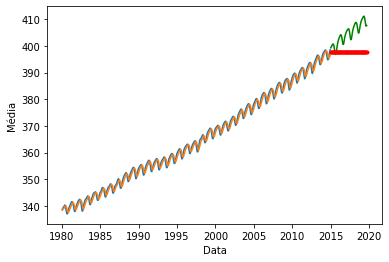

In [85]:
plt.plot(co2_train)
plt.plot(co2_train.index, modelo_ajustado.fittedvalues.values)
plt.plot(co2_test, 'g')
plt.plot(co2_test.index, co2_pred, 'r.')
plt.ylabel('Média')
plt.xlabel('Data')

In [86]:
nascimento = nascimento.set_index('data')

In [87]:
nascimento.head()

,n_nasc
data,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [88]:
nascimento.tail()

,n_nasc
data,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [90]:
nasc_train , nasc_test = nascimento['1959-01-01':'1959-12-01'], nascimento['1959-12-01':]

In [91]:
print(len(nasc_train), len(nasc_test))

335 31


In [92]:
modelo_ajustado = SimpleExpSmoothing(nasc_train).fit(smoothing_level=0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [93]:
nasc_pred = modelo_ajustado.forecast(31)

Text(0.5, 0, 'Data')

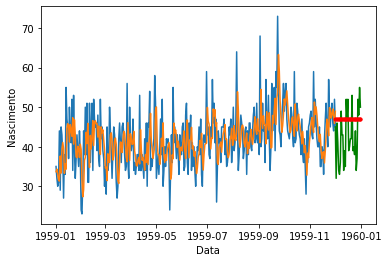

In [94]:
plt.plot(nasc_train)
plt.plot(nasc_train.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_test, 'g')
plt.plot(nasc_test.index, nasc_pred, 'r.')
plt.ylabel('Nascimento')
plt.xlabel('Data')

##Modelo de HoltWinters

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [113]:
modelo_ajustado = ExponentialSmoothing(co2_train.values, trend='additive', seasonal='additive', seasonal_periods=35).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:735: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [102]:
co2_pred = modelo_ajustado.predict(start=420, end=476)

Text(0.5, 0, 'Data')

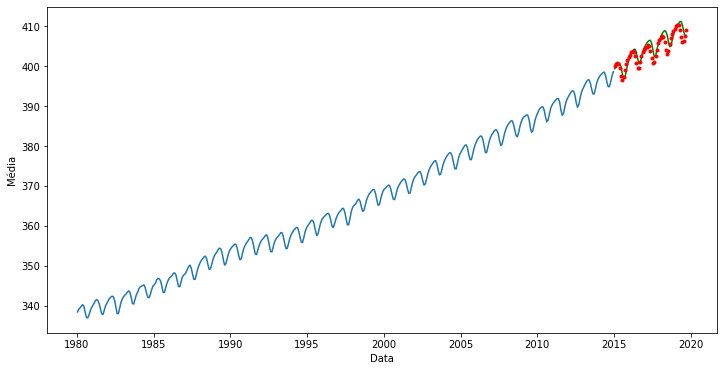

In [104]:
plt.figure(figsize=(12,6))
plt.plot(co2_train)
plt.plot(co2_test, 'g')
plt.plot(co2_test.index, co2_pred, 'r.')
plt.ylabel('Média')
plt.xlabel('Data')

In [114]:
modelo_ajustado = ExponentialSmoothing(nasc_train.values, trend='multiplicative', seasonal=None).fit()

In [115]:
nasc_pred = modelo_ajustado.predict(start=335, end=365)

Text(0.5, 0, 'Data')

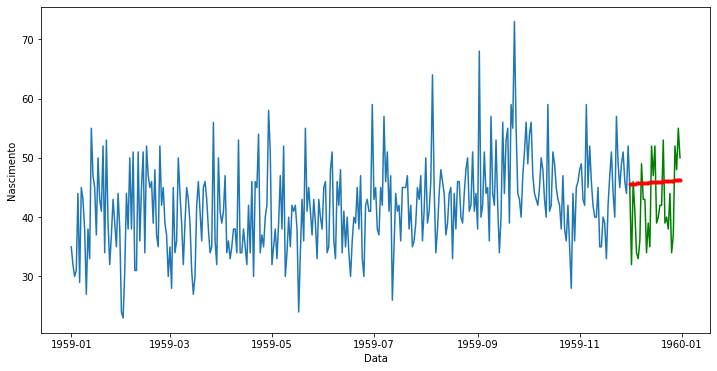

In [116]:
plt.figure(figsize=(12,6))
plt.plot(nasc_train)
plt.plot(nasc_test, 'g')
plt.plot(nasc_test.index, nasc_pred, 'r.')
plt.ylabel('Nascimento')
plt.xlabel('Data')